---------------------
# Feature Reduction with PCA and tSNE

To generate and visualise the pca and tsne embeddings for iris flower(read more about the plant <a href = "https://en.wikipedia.org/wiki/Iris_(plant)">here</a>) dataset.


## Background and about data

Use PCA and tSNE to represent a high dimensional data in lower dimesions thus enabling us to visualize data.
The dataset used here is a classic dataset to study multiclass classification - Iris plant dataset. The data has 3 types of the iris flower -  
- Iris-Setosa
- Iris-Versicolour
- Iris-Virginica

Four different features are described for these 3 types which are-

- sepal length (cm)	
- sepal width (cm)	
- petal length (cm)	
- petal width (cm)

## Objective

Read the data from sklearn.datasets, load it into a dataframe appropriately, do some basic data exploration and then visualize using the 2D embeddings from PCA and tSNE to check if the types are reflected well in these visualisations.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# extract the features, targets and feature names
iris_x = iris.data
iris_y = iris.target
column_names = iris.feature_names

In [5]:
# create dataframe
iris_df = pd.DataFrame(iris_x)
iris_df.columns = column_names
iris_df['Y'] = iris_y
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


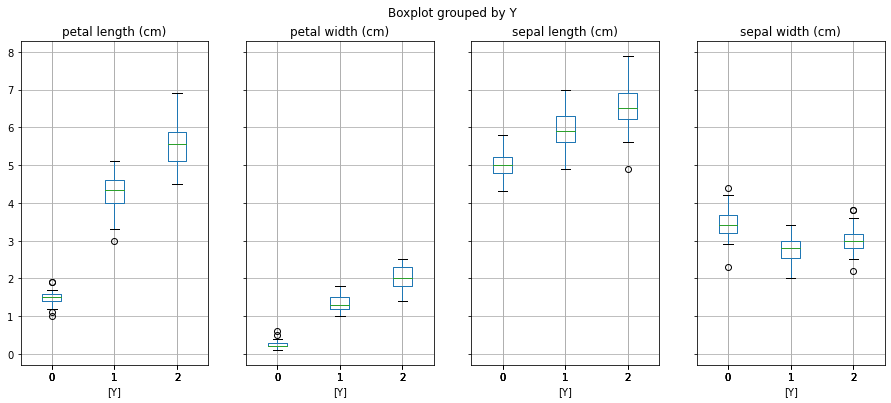

In [7]:
# feature boxplot group by iris type
iris_df.boxplot(by = 'Y', layout = (1,4), figsize=(15,6) )
plt.show()

<AxesSubplot:>

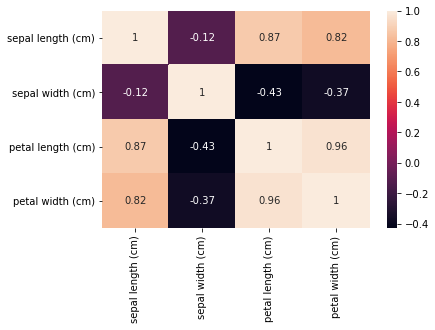

In [8]:
# feature correlation matrix heatmap, to get an idea of the number of components
sns.heatmap(iris_df[column_names].corr(), annot = True)

From the heatmap, three of the features are highly correlated thus two can be dropped, so the number of components is likely to be 2.

In [9]:
# another way to confirm the number of components that explain more than 95% of variance
from sklearn.decomposition import PCA

feature_data = iris_df.iloc[:, 0:-1]
pca = PCA(n_components = feature_data.shape[1])
pca.fit(feature_data)

# find variance explained by all these principal components.
exp_var = pca.explained_variance_ratio_

In [10]:
# find the least number of components that can explain more than 95% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.95):
    print("Number of PCs that explain at least 95% variance: ", ix+1)
    break

Number of PCs that explain at least 95% variance:  2


In [11]:
# so go with 2-components
pca = PCA(n_components = 2)
iris_pca = pd.DataFrame(pca.fit_transform(feature_data))
iris_pca.columns = ['X1', 'X2']
iris_pca["target"] = iris_y

In [12]:
iris_pca.head(3)

,X1,X2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0


In [13]:
# scatterplot of embeddings dataframe with target column as hue
def plot_scatter(iris_pca):
  plt.figure(figsize = (7,7))
  sns.scatterplot(data = iris_pca, x='X1', y='X2', hue='target')

PCA embeddings visualised over target types


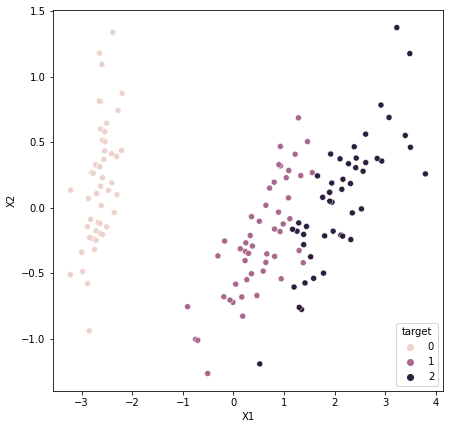

In [14]:
print("PCA embeddings visualised over target types")
plot_scatter(iris_pca)

tSNE embeddings visualized over target types


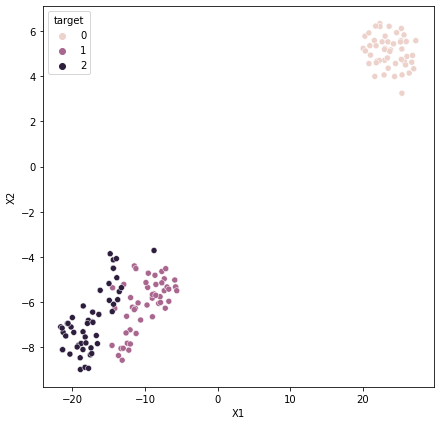

In [15]:
# Implement 2 components tSNE and draw scatterplot
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

iris_tsne = pd.DataFrame(tsne.fit_transform(feature_data))
iris_tsne.columns = ['X1', 'X2']
iris_tsne["target"] = iris_y

print("tSNE embeddings visualized over target types")
plot_scatter(iris_tsne)